In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.shape

(891, 12)

In [4]:
df_test = pd.read_csv("test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_test.shape

(418, 11)

In [6]:
df_sur = pd.read_csv("gender_submission.csv")
df_sur.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
df_sur.shape

(418, 2)

In [8]:
df = pd.merge(df_test,df_sur,on='PassengerId')
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [9]:
df_titanic = pd.concat([df_train,df],axis=0)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df_titanic.shape

(1309, 12)

In [11]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


* Column Survived,Pclass,SibSp,Parch are Categorical Columns.
* Age should be of Int Datatype instead of Float.

In [12]:
df_titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,1309.0,0.377387,0.484918,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


In [13]:
df_titanic.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [14]:
df_titanic.duplicated().sum()

0

**Changing Datatypes**

In [15]:
#df_titanic['Age'] =df_titanic['Age'].astype('int64')
#df_titanic['Survived'] = df_titanic['Survived'].astype('category')
#df_titanic['Pclass'] = df_titanic['Pclass'].astype('category')
#df_titanic['Parch'] = df_titanic['Parch'].astype('category')

**Outliers Check**

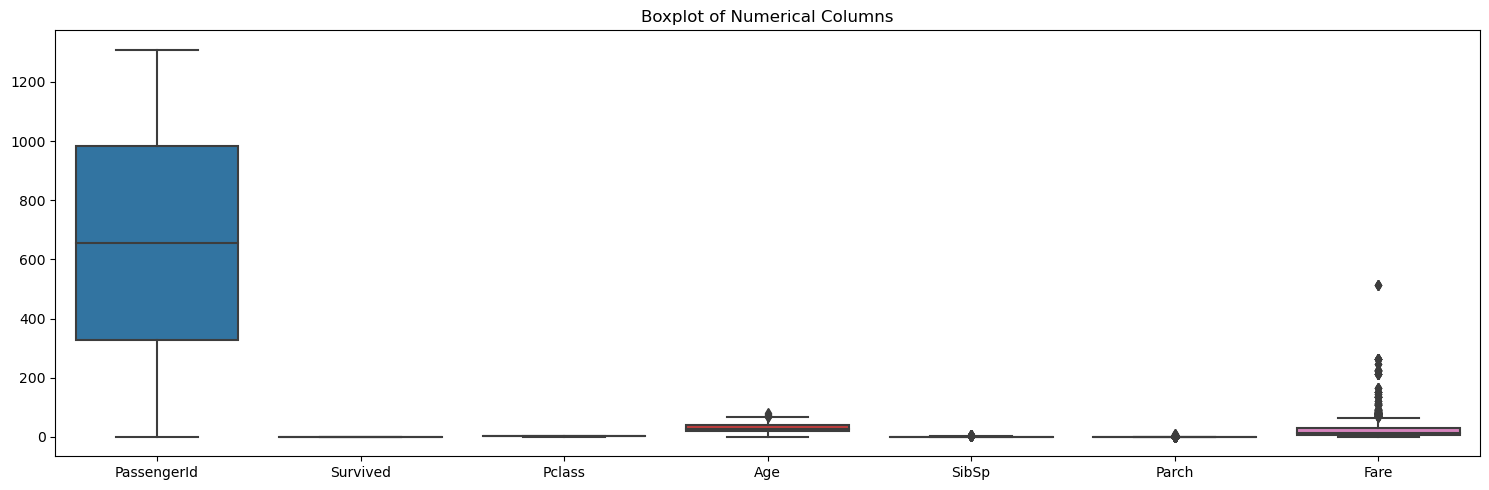

In [16]:
plt.figure(figsize=(15,5))
#churn_df.boxplot()
sns.boxplot(df_titanic)
plt.title("Boxplot of Numerical Columns",color='black')
plt.tight_layout()

### Imputing Missing Values

In [17]:
df_titanic.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

* For Imputing Missing values of Age column : 
* Wiil impute missing values with the mean of each passenger class.

<Axes: xlabel='Pclass', ylabel='Age'>

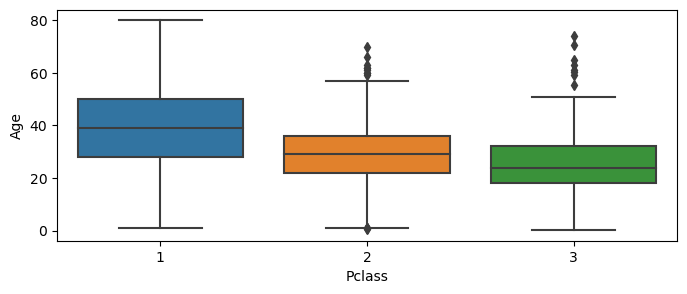

In [18]:
plt.figure(figsize=(8,3))
sns.boxplot(x='Pclass',y='Age',data=df_titanic)

* We can see that wealthier passengers in the higher classes tends to be older, which makes sense. We'll use these average age     values to impute based on Pclass for Age.

In [19]:
df_titanic[df_titanic['Pclass']==1]['Age'].mean()

39.15992957746479

In [20]:
df_titanic[df_titanic['Pclass']==2]['Age'].mean()

29.506704980842912

In [21]:
df_titanic[df_titanic['Pclass']==3]['Age'].mean()

24.81636726546906

In [22]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [23]:
df_titanic['Age'] = df_titanic[['Age','Pclass']].apply(impute_age,axis=1)

In [24]:
df_titanic['Age'].isnull().sum()

0

In [25]:
# Drop Columnn Cabin

df_titanic.drop('Cabin',axis=1,inplace=True)

In [26]:
# Drop null values of Fare & Embarked Column

df_titanic.dropna(inplace=True)

In [27]:
df_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Univariate Analysis**

In [28]:
df_titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


### Age distribution


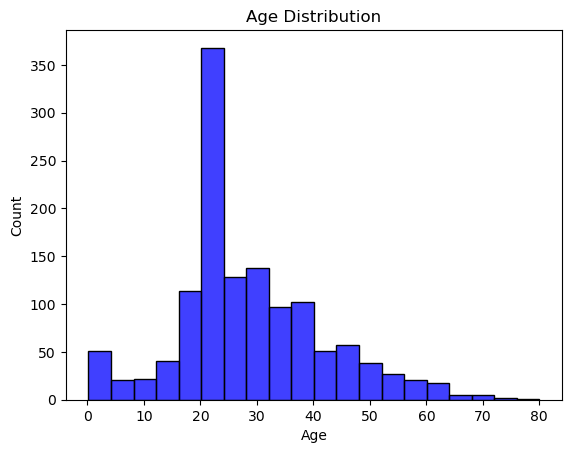

In [29]:
sns.histplot(df_titanic['Age'],color='blue',bins=20)
plt.title("Age Distribution",color='black')
plt.show()

### Distribution of Target Class

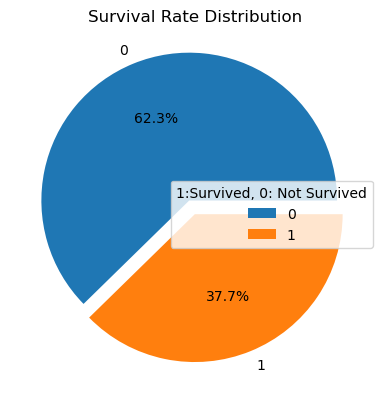

Out of 1309 62% people died in the accident


In [30]:
plt.pie(df_titanic['Survived'].value_counts(),labels=df_titanic['Survived'].value_counts().index,autopct="%.1f%%",explode=[0.1, 0])
plt.title("Survival Rate Distribution")
plt.legend(title = "1:Survived, 0: Not Survived",loc='center right') 
plt.show()

death_percent=round((df_titanic['Survived'].value_counts().values[0]/1309)*100)

print("Out of 1309 {}% people died in the accident".format(death_percent))

In [31]:
df_titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


### Distribution of Passenger class

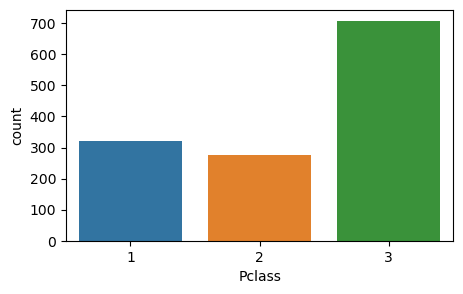

In [32]:
plt.figure(figsize=(5,3))
sns.countplot(x=df_titanic['Pclass'])
plt.show()

* Class 3 passengers are more on Board as compared to other two classes.

### Distribution of Gender

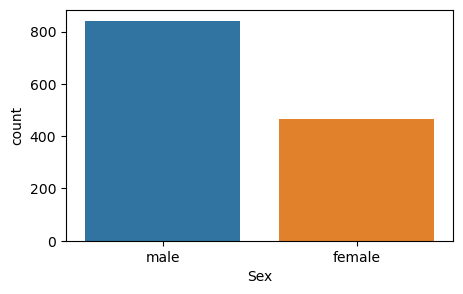

In [33]:
plt.figure(figsize=(5,3))
sns.countplot(x=df_titanic['Sex'])
plt.show()

* Ration of Male is more as compared to Female.

### Distribution of Parch

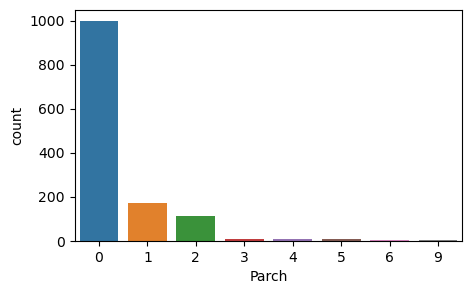

In [34]:
plt.figure(figsize=(5,3))
sns.countplot(x=df_titanic['Parch'])
plt.show()

### Distribution of SibSp

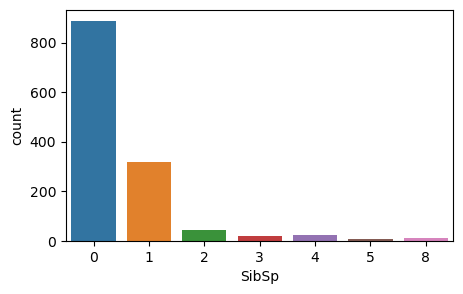

In [35]:
plt.figure(figsize=(5,3))
sns.countplot(x=df_titanic['SibSp'])
plt.show()

### Distribution of Embarked

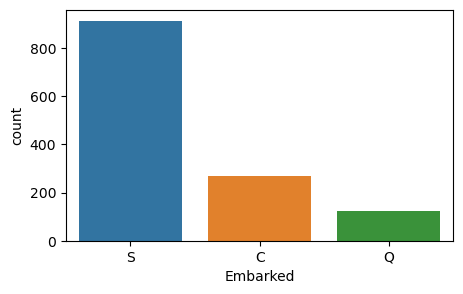

In [36]:
plt.figure(figsize=(5,3))
sns.countplot(x=df_titanic['Embarked'])
plt.show()

### Boxplots

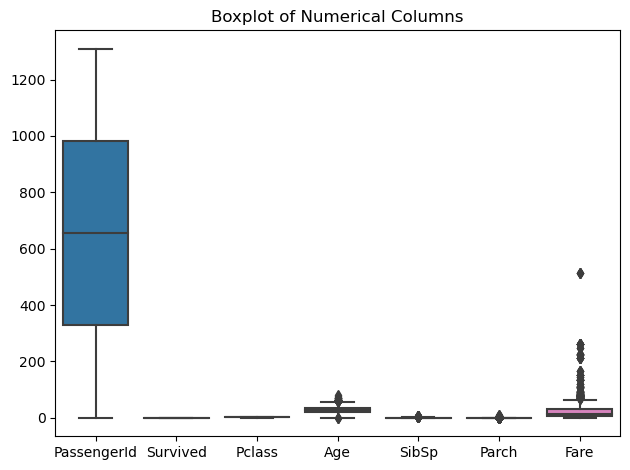

In [37]:
sns.boxplot(data=df_titanic)
plt.title("Boxplot of Numerical Columns",color='black')
plt.tight_layout()
plt.show()

### Distribution of fare

C:\Users\Sai Ganesh\AppData\Local\Temp\ipykernel_11192\4061505696.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_titanic['Fare'])


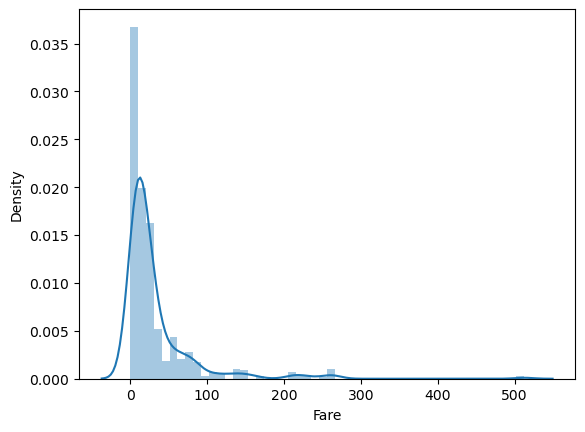

In [38]:
sns.distplot(df_titanic['Fare'])
plt.show()

In [39]:
print("People with Fare less than $200: ",df_titanic[df_titanic['Fare']<200].shape[0])
print("People with Fare between $200 and $300: ",df_titanic[(df_titanic['Fare']>200) & (df_titanic['Fare']<300)].shape[0])
print("People with Fare greater than $300: ",df_titanic[df_titanic['Fare']>300].shape[0])

People with Fare less than $200:  1268
People with Fare between $200 and $300:  34
People with Fare greater than $300:  4


In [40]:
# sns.histplot(x='Fare',data=df_titanic,hue='Pclass')
# plt.show()

<Axes: >

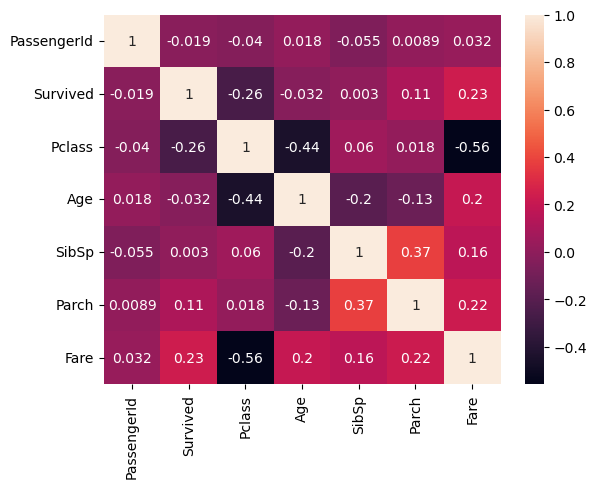

In [41]:
sns.heatmap(df_titanic.corr(numeric_only=True),annot=True)

* Lower the number in Pclass, higher is the Survival rate.


### Survived Vs Pclass

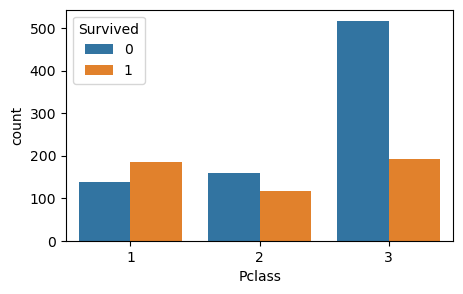

In [42]:
plt.figure(figsize=(5,3))
sns.countplot(x=df_titanic['Pclass'],data=df_titanic,hue='Survived')
plt.show()

* Survival Rate is low for Class 3 passengers.

In [43]:
pd.crosstab(df_titanic['Pclass'], df_titanic['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Pclass,,
1,42.7,57.3
2,57.8,42.2
3,73.0,27.0


### Survival Vs Gender

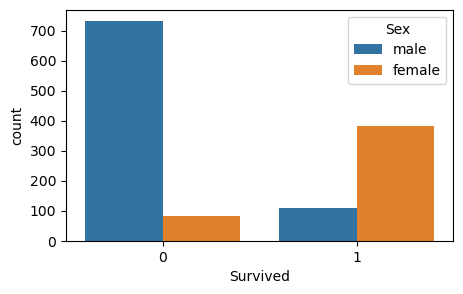

In [44]:
plt.figure(figsize=(5,3))
sns.countplot(x=df_titanic['Survived'], hue=df_titanic['Sex'])
plt.show()


In [45]:
pd.crosstab(df_titanic['Sex'], df_titanic['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Sex,,
female,17.5,82.5
male,87.1,12.9


* More Females survived than Male.

### Survival Vs Embarked

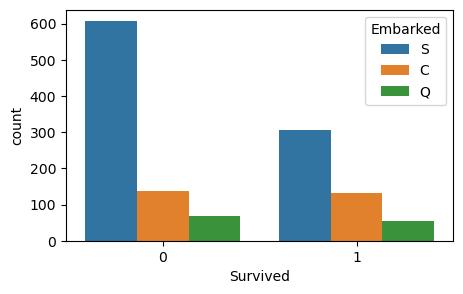

In [46]:
plt.figure(figsize=(5,3))
sns.countplot(x=df_titanic['Survived'], hue=df_titanic['Embarked'])
plt.show()


In [47]:
pd.crosstab(df_titanic['Embarked'], df_titanic['Survived']).apply(lambda x: round((x/x.sum())*100,1), axis=1)


Survived,0,1
Embarked,,
C,50.7,49.3
Q,56.1,43.9
S,66.6,33.4


### Survival Vs Pclass

<Axes: xlabel='Survived', ylabel='count'>

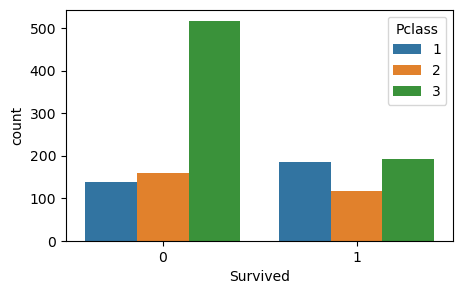

In [48]:
plt.figure(figsize=(5,3))
# sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df_titanic)

C:\Users\Sai Ganesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x300 with 0 Axes>

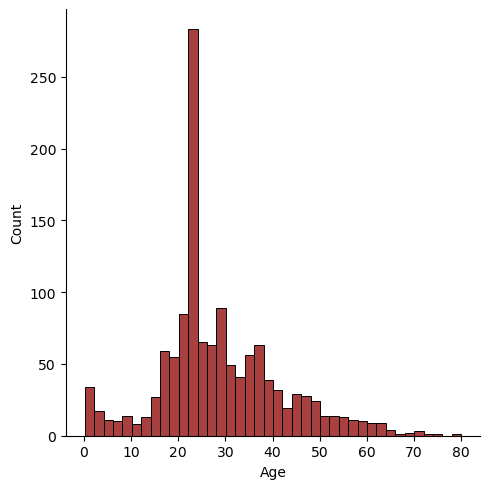

In [49]:
plt.figure(figsize=(5,3))
sns.displot(df_titanic['Age'].dropna(),kde=False,color='darkred',bins=40)

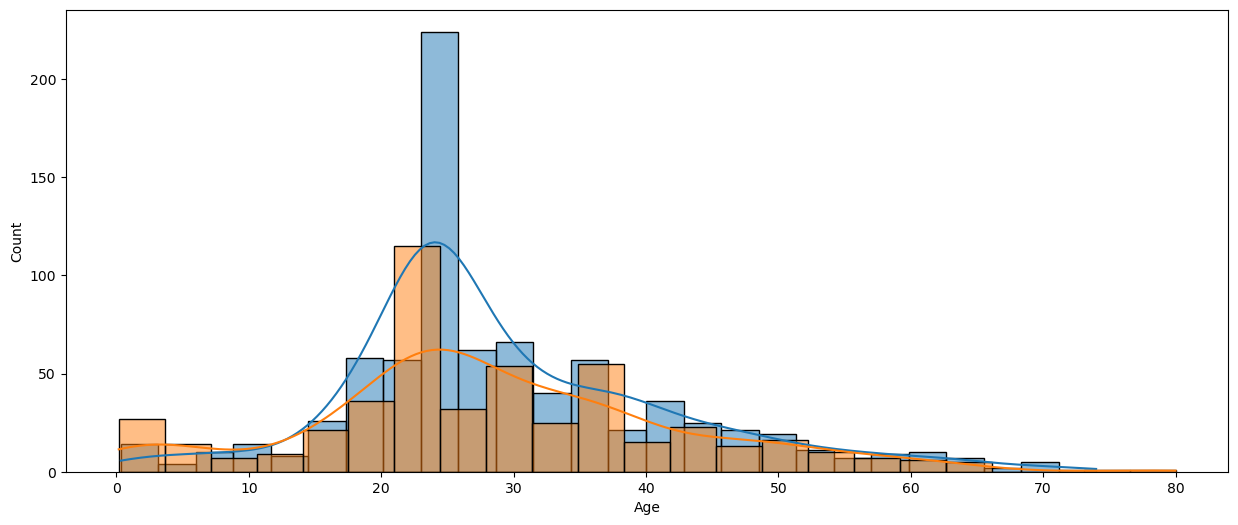

In [50]:
plt.figure(figsize=(15,6))
#labels = ['Survived','Not Survived']
sns.histplot(df_titanic[df_titanic['Survived']==0]['Age'],kde=True,legend=True)
sns.histplot(df_titanic[df_titanic['Survived']==1]['Age'],kde=True,legend=True)
#plt.legend()
plt.show()

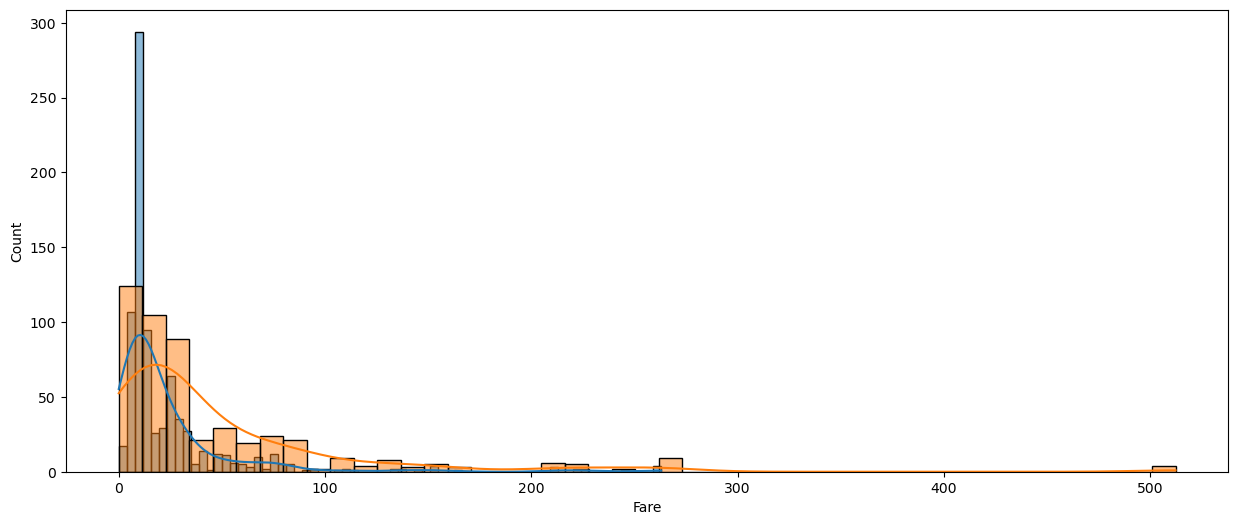

In [51]:
plt.figure(figsize=(15,6))
sns.histplot(df_titanic[df_titanic['Survived']==0]['Fare'],kde=True)
sns.histplot(df_titanic[df_titanic['Survived']==1]['Fare'],kde=True)
plt.show()

C:\Users\Sai Ganesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


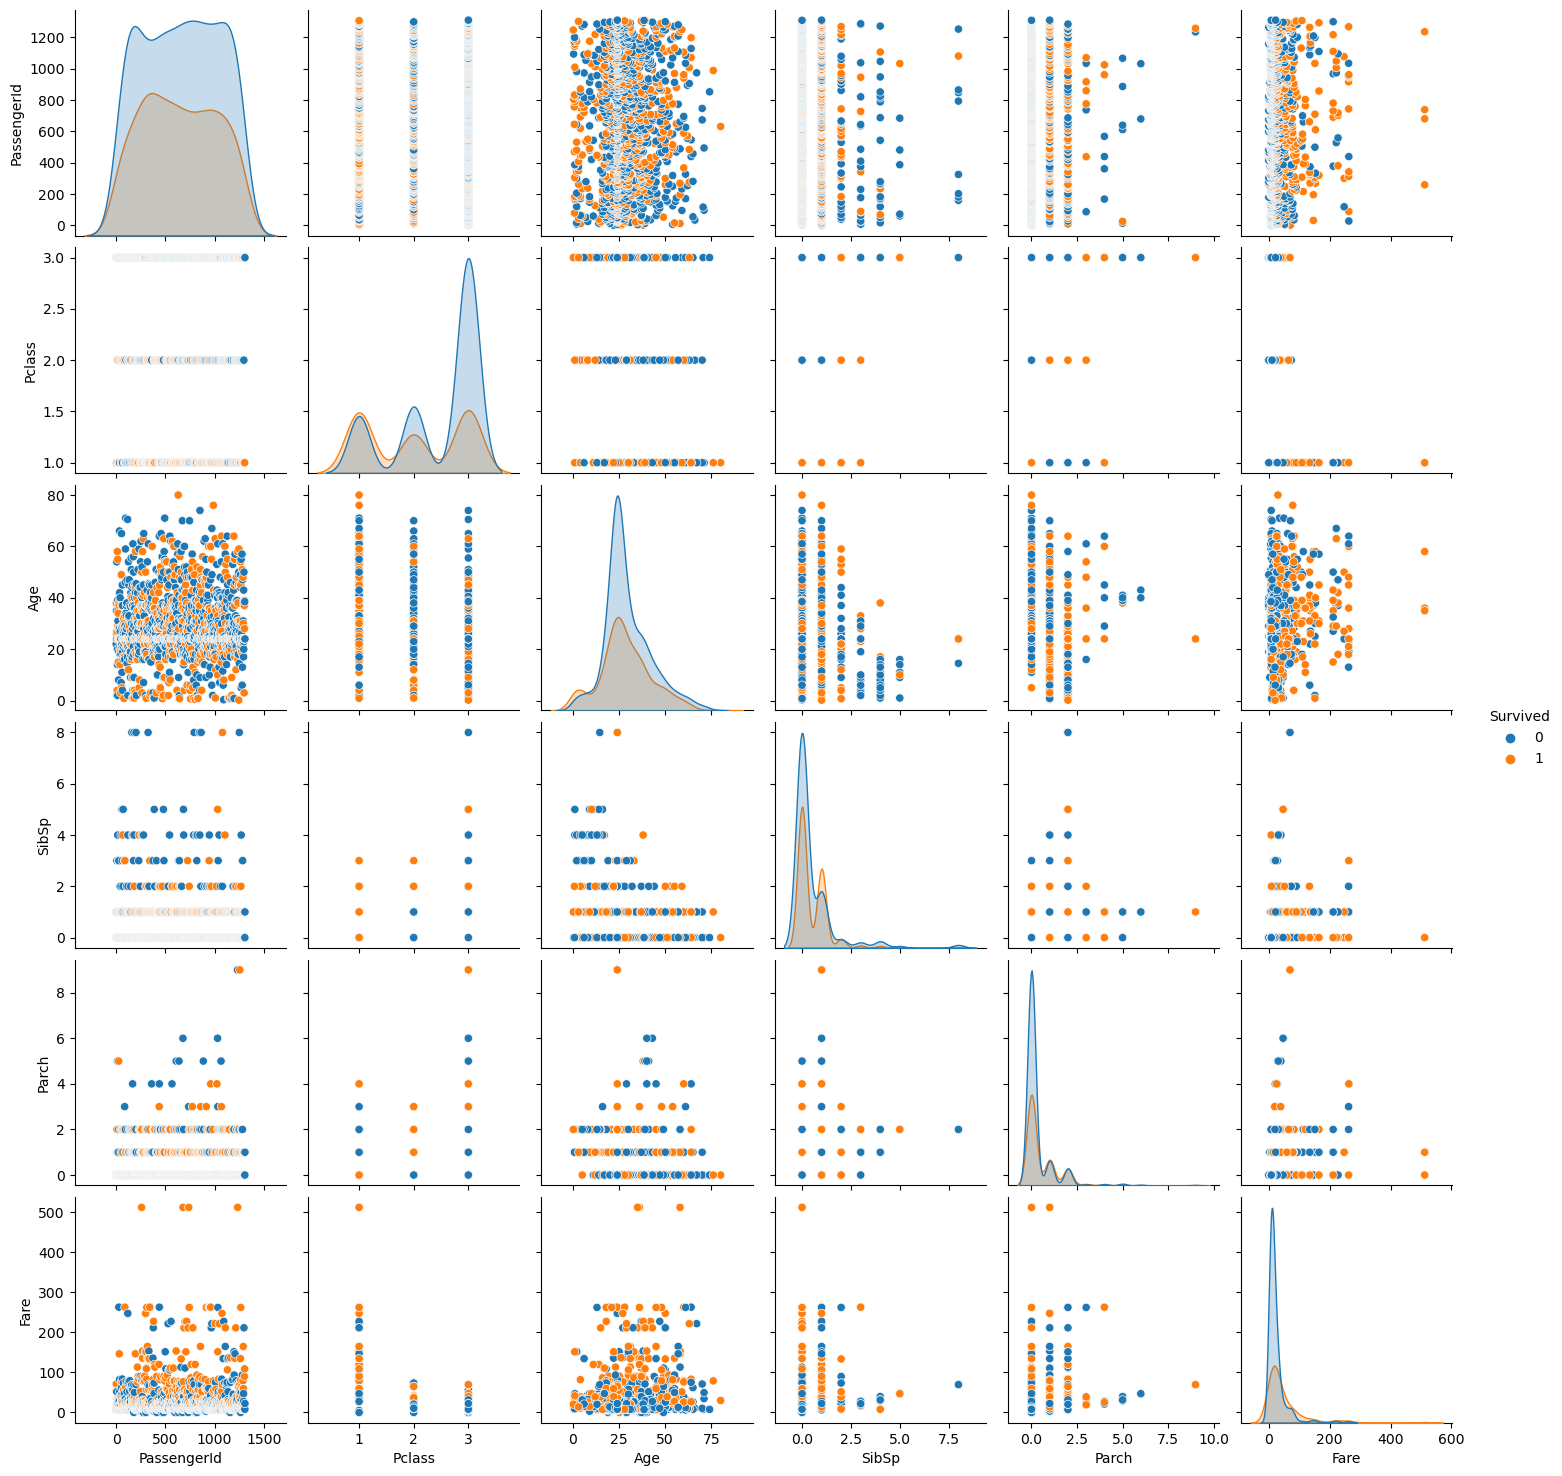

In [52]:
sns.pairplot(df_titanic,hue='Survived')

### Outlier Treatment

In [53]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1306 non-null   int64  
 1   Survived     1306 non-null   int64  
 2   Pclass       1306 non-null   int64  
 3   Name         1306 non-null   object 
 4   Sex          1306 non-null   object 
 5   Age          1306 non-null   float64
 6   SibSp        1306 non-null   int64  
 7   Parch        1306 non-null   int64  
 8   Ticket       1306 non-null   object 
 9   Fare         1306 non-null   float64
 10  Embarked     1306 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 122.4+ KB


In [54]:
# Define a function which returns the Upper and Lower limit to detect outliers for each feature.
def remove_outlier(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [55]:
# Cap & floor the values beyond the outlier boundaries
outlier_col = ['Age','SibSp','Parch','Fare']
#feature_list=ad_num.columns
for i in outlier_col:
    LL,UL = remove_outlier(df_titanic[i])
    df_titanic[i] = np.where(df_titanic[i] > UL,UL,df_titanic[i])
    df_titanic[i] = np.where(df_titanic[i] < LL,LL,df_titanic[i])

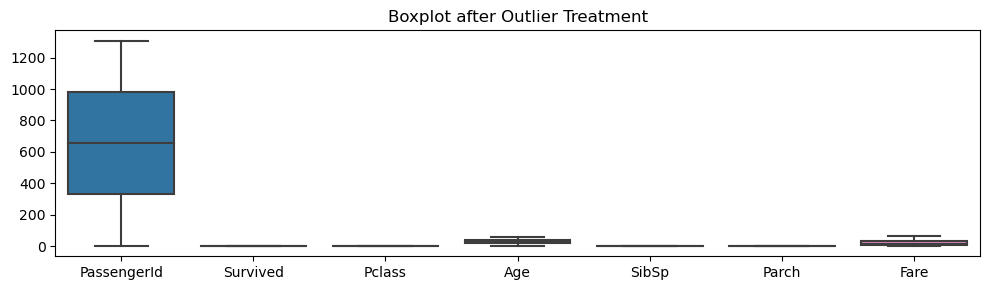

In [56]:
plt.figure(figsize=(10,3))
sns.boxplot(df_titanic)
plt.title("Boxplot after Outlier Treatment",color='black')
plt.xticks(color='black')
plt.tight_layout()
plt.show()